### generative & inference models for polychronous groups

In [22]:
from brainhack import *



## Figure avec un nombre réduit de neurones / synapses

In [23]:
N_PGs = 4
opt_fig1 = Params(  datetag = datetag + '_fig1',
                    N_pre = 10, 
                    N_PGs = N_PGs,
                    N_PG_time = 71,
                    p_PG = .07,
                    E_PG=14.0,
                    p_A = 0.0005,
                    p_B = 0.001,
                    N_PG_show = N_PGs,
                    N_trials = 1,
                    N_time = 240,
                    seed = 2373,
                    fig_width = 4.5,
                    )
                    
env_fig1 = ABCD(opt_fig1)
# a, b, PG = env_fig1.generative_model()
PG = env_fig1.set_PG(seed=opt_fig1.seed)
b = env_fig1.get_b(seed=opt_fig1.seed+1)

In [24]:
opt_fig1, env_fig1.opt, env_fig1.opt.N_pre, env_fig1.opt.N_PGs

(Params(datetag='2022-11-28_fig1', N_pre=10, N_PG_time=71, N_PGs=4, E_PG=14.0, p_PG=0.07, tau_decay=0.4, tau_rise=0.05, N_time=240, N_trials=1, p_B=0.001, p_A=0.0005, seed=2373, verbose=False, fig_width=4.5, phi=1.61803, N_PG_show=4),
 Params(datetag='2022-11-28_fig1', N_pre=10, N_PG_time=71, N_PGs=4, E_PG=14.0, p_PG=0.07, tau_decay=0.4, tau_rise=0.05, N_time=240, N_trials=1, p_B=0.001, p_A=0.0005, seed=2373, verbose=False, fig_width=4.5, phi=1.61803, N_PG_show=4),
 10,
 4)

In [25]:
env_fig1.opt.N_pre, env_fig1.opt.N_PGs, env_fig1.opt.N_PG_time

(10, 4, 71)

In [26]:
subplotpars_fig1 = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0.08, hspace=0.05,)
figsize = (env_fig1.opt.fig_width, env_fig1.opt.fig_width/env_fig1.opt.phi)
colors = ['r', 'g' , 'b' , 'm']
shift = -0.23

In [27]:
b = torch.zeros(b.shape)
b[0, 0, 50] = True
b[0, 1, 201] = True
b[0, 1, 114] = True
b[0, 2, 42] = True
b[0, 2, 104] = True
b[0, 3, 180] = True
b.shape

torch.Size([1, 4, 240])

In [28]:
PG.shape

torch.Size([10, 4, 71])

In [29]:
PG.mean(), PG.abs().max(), PG.min(), PG.max()

(tensor(0.000), tensor(25.070), tensor(-20.056), tensor(25.070))

In [30]:
figpath

'figures'

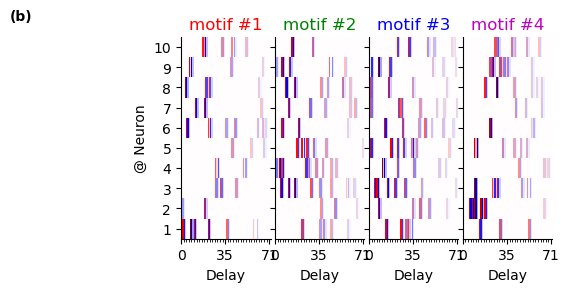

In [31]:
fig, axs = env_fig1.plot_PG(PG, colors=colors)
fig.text(shift, 1.05,'(b)', horizontalalignment='center', verticalalignment='center', weight='bold')
if not figpath is None: printfig(fig, 'figure_motifs')
plt.show()

Then from the following raster plot, each PG described if the figure above will be selective to the spatio-temporal pattern of the same color: 

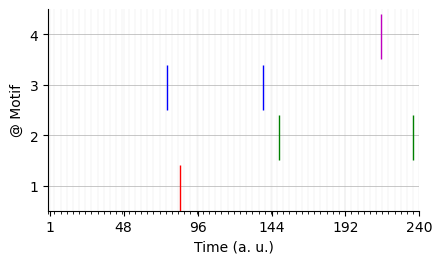

In [32]:
fig, ax = env_fig1.plot_b(b, colors=colors, yticks=env_fig1.opt.N_PGs)

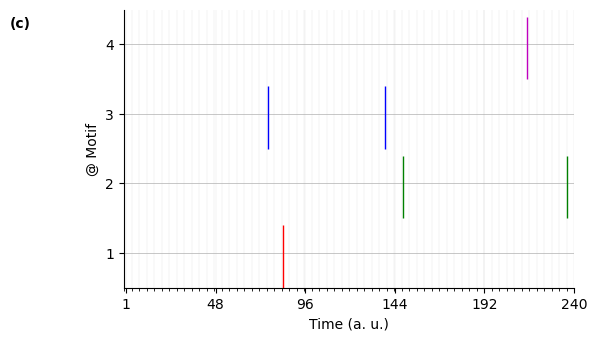

In [33]:
fig, ax = env_fig1.plot_b(b, colors=colors, figsize=figsize, subplotpars=subplotpars_fig1, yticks=env_fig1.opt.N_PGs)
fig.text(shift, 0.95,'(c)', horizontalalignment='center', verticalalignment='center', weight='bold')

if not figpath is None: printfig(fig, 'figure_raster_motifs')


In [34]:
a = env_fig1.draw_a(b, PG)

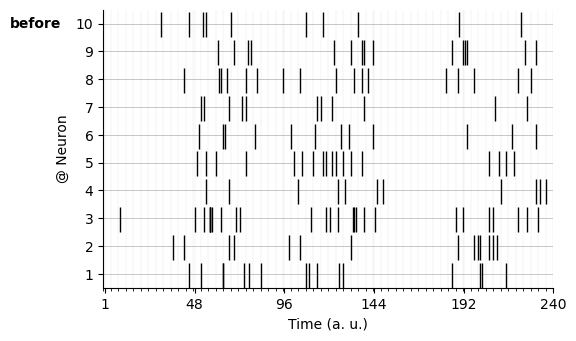

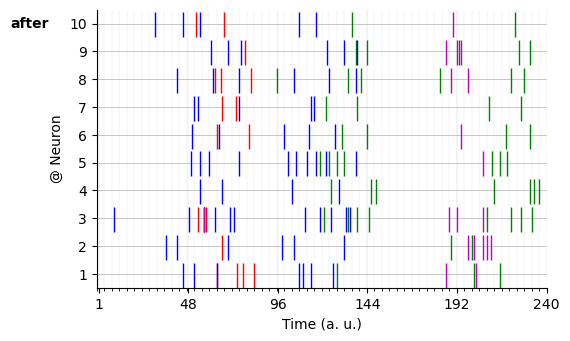

In [35]:
for text in ['before', 'after']:
    fig, ax = env_fig1.plot_a(a, b, PG, colors=colors if text=='after' else ['k'], figsize=figsize, subplotpars=subplotpars_fig1, yticks=env_fig1.opt.N_pre)
    
    fig.text(-0.15, 0.95, text, horizontalalignment='center', verticalalignment='center', weight='bold')
    printfig(fig, 'figure_motif_' + text)

    plt.show()